In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix:
 [[171  13]
 [ 28  88]]


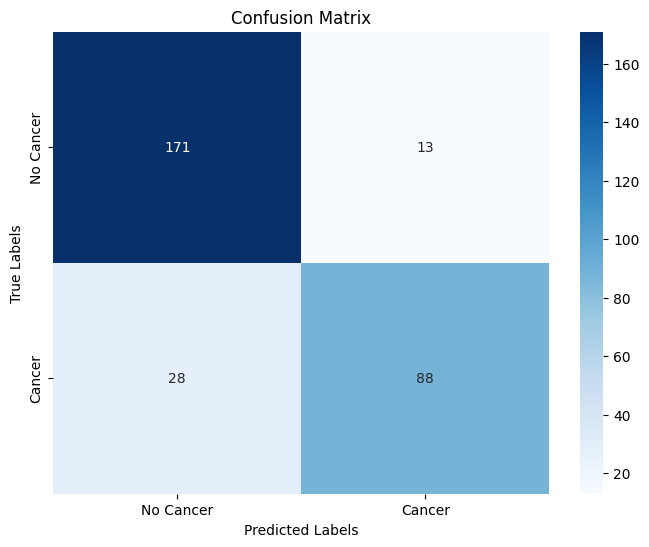

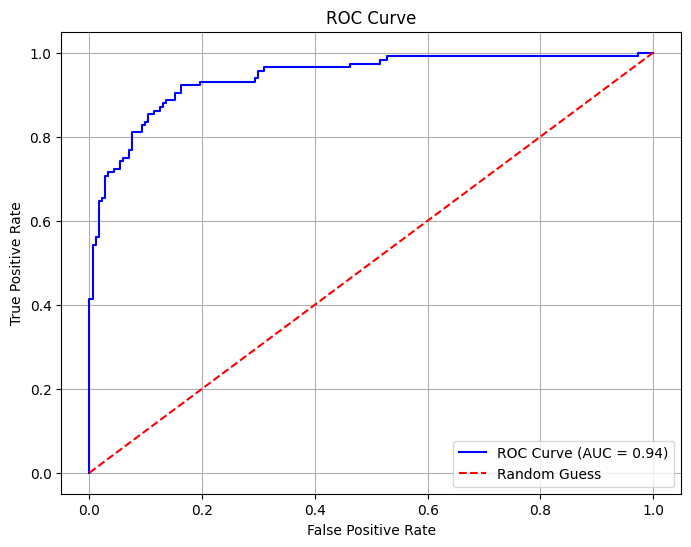

In [22]:
# Load the processed dataset
df = pd.read_csv("../Data/The_Cancer_data_1500_V3_Processed.csv")  # Use the correct file path


# Split data into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']                 # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


# Confusion Matrix - Improved Visualization and Save
def plot_and_save_confusion_matrix(y_test, y_pred, filename):
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig(filename)
    plt.show()

# ROC Curve - Improved Visualization and Save
def plot_and_save_roc_curve(fpr, tpr, roc_auc, filename):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

# Plot and Save Confusion Matrix
plot_and_save_confusion_matrix(y_test, y_pred, "../Data/confusion_matrix.png")

# Plot and Save ROC Curve
plot_and_save_roc_curve(fpr, tpr, roc_auc, "../Data/roc_curve.png")

Feature Importances:
             Feature  Importance
2               BMI    0.162140
6     AlcoholIntake    0.152661
5  PhysicalActivity    0.150525
7     CancerHistory    0.146533
0               Age    0.134869
4       GeneticRisk    0.124384
1            Gender    0.073896
3           Smoking    0.054993


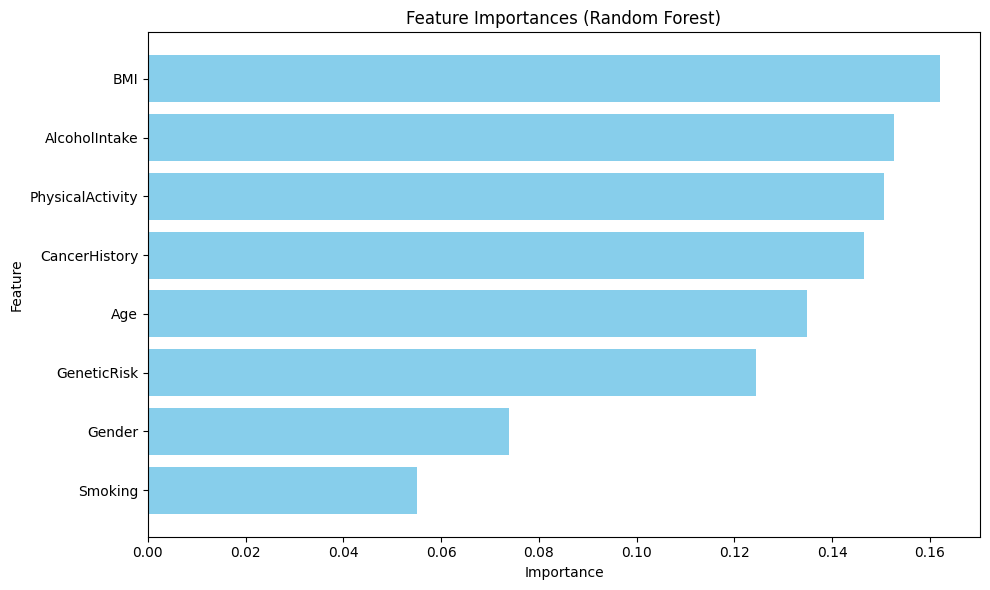

Feature importances image saved at: ../Data/feature_importances.png


In [23]:

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

import matplotlib.pyplot as plt
import os

# Ensure the Data folder exists
data_folder = "../Data/"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Plot and save the feature importance bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.tight_layout()

# Save the image to the Data folder
output_path = os.path.join(data_folder, "feature_importances.png")
plt.savefig(output_path)
plt.show()

print(f"Feature importances image saved at: {output_path}")



In [24]:


# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_


Best Parameters: {'C': 1}
Best Score: 0.8483333333333333


Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



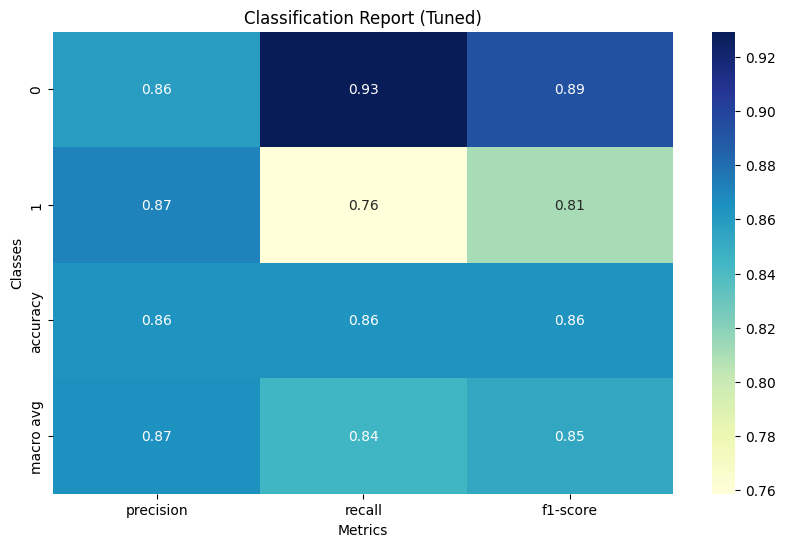

Classification report image saved at: ../Data/classification_report_tuned.png


In [25]:
y_pred_tuned = best_model.predict(X_test)
print("Classification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Generate classification report as dictionary
report = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert the dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu")  # Exclude support column and last row (avg/total)
plt.title("Classification Report (Tuned)")
plt.xlabel("Metrics")
plt.ylabel("Classes")

# Save the image
output_path = "../Data/classification_report_tuned.png"
plt.savefig(output_path)
plt.show()

print(f"Classification report image saved at: {output_path}")
